# Transformer #

### **RNN과 LSTM의 한계** ###

#### **RNN의 한계점** ####

(1) RNN 구조의 특성 상 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐

(2) 기울기 소실 (Vanishing Gradients)

(3) 기울기 폭주 (Exploding Gradients)

(4) 느린 훈련 시간



-> 위의 문제들은 **장기의존성문제**라는 치명적인 문제로 이어짐

#### **LSTM의 장점과 단점** ####

**장점**: Vanishing gradient problem 효과적으로 완화 (≠해결)
<br>**단점**: 매우 복잡한 구조, RNN보다 학습 파라미터가 많아짐

### **Transformer란?** ###

: RNN의 순차적인 계산 방식을 완전히 버리고, 오직 어텐션(Attention)만으로 문장의 의미와 구조를 파악하는 모델

### **Self-Attention** ###

**Query, Key, Value** 

Querry : 원하는 것을 찾기 위한 명확한 요청
<br>key :모든 정보들이 달고 있는 '이름표' 또는 '색인'. 쿼리는 이 키들과 자신을 비교하며 얼마나 관련이 있는지 확인
<br>Value : 쿼리와 키의 관련도 계산이 끝나고, 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 밸류를 가져와 사용

### **Cross-Attention vs. Self-Attention** ###

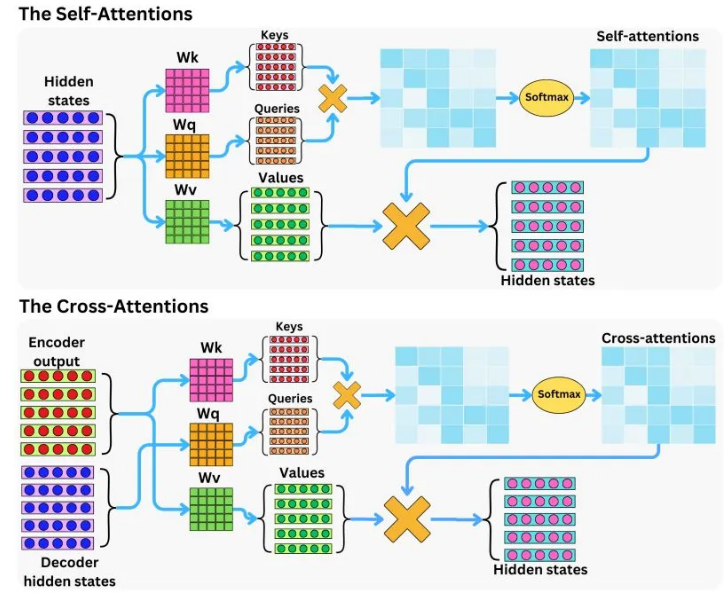

| 구분 | 기존 어텐션 (Cross-Attention) | 셀프 어텐션 (Self-Attention) |
| --- | --- | --- |
| 핵심 아이디어 | 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성 | 문장 자체를 뜯어보며 내부 관계를 파악 |
| 작동 방식 | 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘 | 한 문장 내 모든 단어끼리 서로의 관계를 계산 |
| 참조 대상 | 서로 다른 시퀀스 (인코더 ↔ 디코더) | 동일한 시퀀스 (문장 내부 ↔ 문장 내부) |
| 주요 목적 | 인코더-디코더 연결, 정보 병목 현상 해소 | 시퀀스 내부의 문맥 및 의존 관계 파악 |
| 기반 아키텍처 | RNN (LSTM, GRU) | 트랜스포머 (Attention Only) |
| 병렬 처리 | 불가능 (순차적)  | 가능  |

**기존 Attention in Seq2Seq (Cross-Attention)**

1. Query 만들기
2. Key, Value 불러오기
3. 유사도 계산 (Attention Score)
4. Weighted Sum
5. Decoder가 다음 단어를 예측

**Self-Attention**

1. 단어의 프로필 만들기 (벡터 임베딩)
2. 단어 간 관계 점수 계산 (내정 및 정렬 점수)
3. 중요도 배분 (소프트맥스 & 어텐션 가중치)
4. 문맥이 풍부해진 새로운 프로필 생성

### **Scaled Dot-Product Attention** ###

**Dot-Product Attention**

 : Attention Score를 계산하는 가장 기본적인 방법 중 하나. 쿼리(Query)와 키(Key) 벡터를 내적(Dot Product)하여 유사도를 구함

1. 쿼리(Q) 벡터와 모든 키(K) 벡터를 각각 내적하여 유사도 계산을 진행
2. 계산된 값에 Softmax 함수를 적용하여 총합이 1인 Attention Weight 산출
3. 이 가중치를 밸류(V) 벡터에 곱하여 최종 결과값을 계산

**문제점**

: 벡터의 차원 $d_k$가 커질수록 내적의 결과가 너무 커지거나 작아지게 되는 문제가 존재, 
<br>극단적인 Attention Score가 Softmax 함수에 들어가게 되면, gradient의 결과가 0에 가까워지는, Vanishing Grandient가 여기에서도 발생

**Scaled Dot-Product Attention**

: 기존의 Dot-Product Attention의 문제를 해결하고자, "Attention is All You Need"의 저자들이 제안한 현재 트랜스포머 방식의 표준

1. 쿼리(Q) 벡터와 모든 키(K) 벡터를 각각 내적하여 유사도 계산을 진행
2. 계산된 값을 $\sqrt{d_K}$ 로 나누어 스케일링을 진행
3. 스케일링을 진행한 값에 Softmax 함수를 적용하여 총합이 1인 Attention Weight 산출
4. 이 가중치를 밸류(V) 벡터에 곱하여 최종 결과값을 계산

### **Multi-Head attention** ###

: 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습 Attention is all you need 에서는 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고, Attention 스코어를 병렬로 여러 번 계산 하는 과정을 말함

**작동방식**

1. 분할 (Projection) - 8명의 헤드에 단어 벡터 할당
2. 병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행
3. 결합 및 최종 투영 - 전문가들의 분석 결과 취합

### **Transformer 전체 아키텍처** ###

**Transformer 전처리**

1. 토큰화

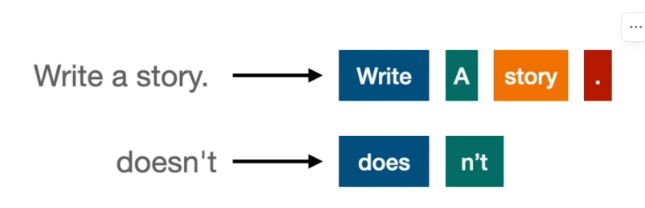

: 입력 텍스트를 모델이 처리할 수 있는 단위로 나누는 첫단계

2. 임베딩

: 토큰화된 각 단위(토큰)는 임베딩 단계에서 숫자의 벡터로 변환
<br> - 임베딩은 인간의 언어(단어)를 컴퓨터의 언어(숫자)로 번역하는 다리 역할

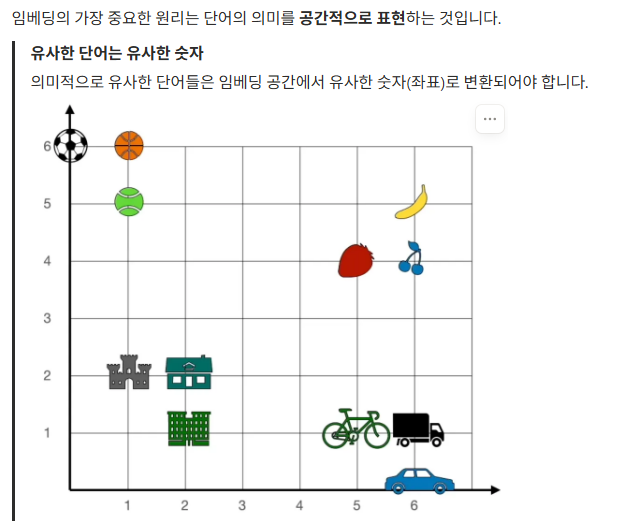

3. Positional Encoding

:  단어들의 순서 정보를 임베딩 벡터에 추가하는 단계
<br>- 단어들은 문법적 측면이나, 문맥을 파악하기 위해서나 등장한 순서가 매우 중요하기 때문에, 이 순서 정보, 즉 위치 정보를 제공하기 위해 positional encoding을 사용

### **트랜스포머의 Encoder와 Decoder** ###

**Encoder**

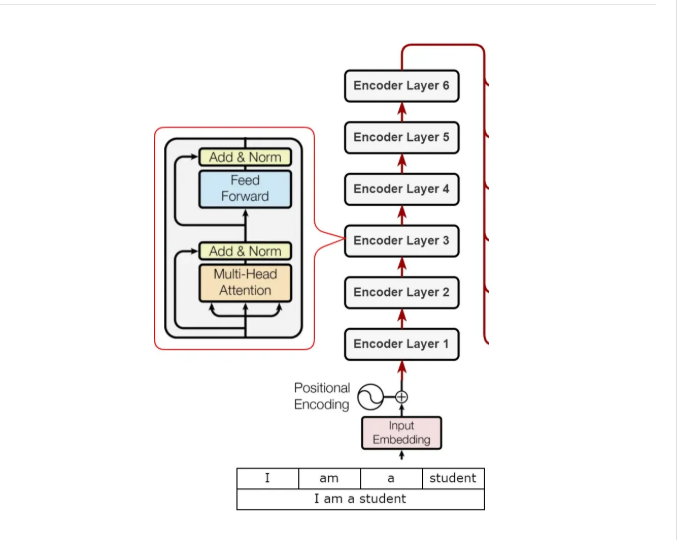

: 트랜스포머의 Encoder는 입력 문장을 이해하고 요약된 의미 벡터로 변환하는 역할
<br>: 전처리 과정(토큰화, 임베딩, Positional Encoding) 및 인코더 레이어(Multi-Head Attention, Feed Forward Layer)로 구성

**Decoder**

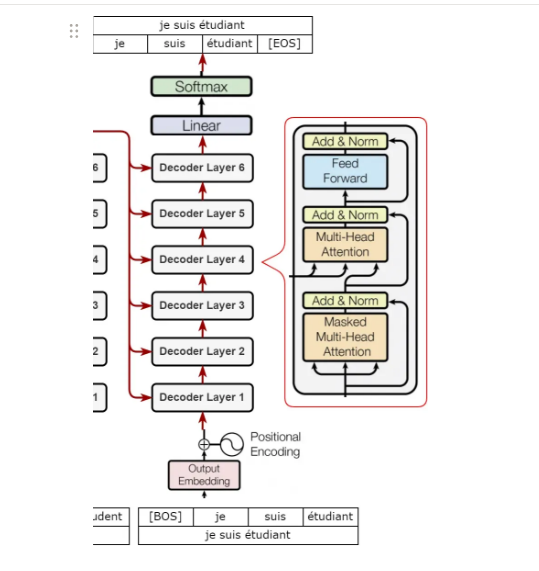

:트랜스포머의 **Decoder**는 Encoder가 분석한 입력 문장의 의미 벡터를 받아서 **출력 문장**을 **순차적으로 생성**하는 역할을 담당

<br> :전처리 과정, 디코더 레이어, 선형 레이어와 소프트맥스 레이어로 이루어짐

**디코더 레이어의 구성**

1. Masked Multi-Head Attention
2. Encoder-Decoder** Multi-Head Attention (Cross-Attention)
3. Feed-Forward Layer

**Masked Multi-Head Attention**

: 미래 시점의 단어 정보를 참고하지 못하도록 마스크(mask)를 적용하는 어텐션 메커니즘

- 트랜스포머의 디코더는 시퀀스를 왼쪽에서 오른쪽으로(autogressive) 생성하며, 모델이 이미 생성된 단어들(과거 정보)만을 기반으로 다음 단어를 예측하도록 강제
- 이를 위해 Look-Ahead Mask(Causal Mask)를 사용하여 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시

**Encoder-Decoder Attention (Cross-Attention)**

: 디코더가 인코더의 출력(Context)을 참고하면서 현재 생성 중인 단어를 입력 문장의 의미와 연결하는 과정

| 벡터 종류 | 어디서 오는가 |
| --- | --- |
| **Query (Q)** | 디코더의 이전 서브레이어 출력 |
| **Key (K)**, **Value (V)** | 인코더의 최종 출력 (Context Vector) |

### **전체데이터 흐름** ###

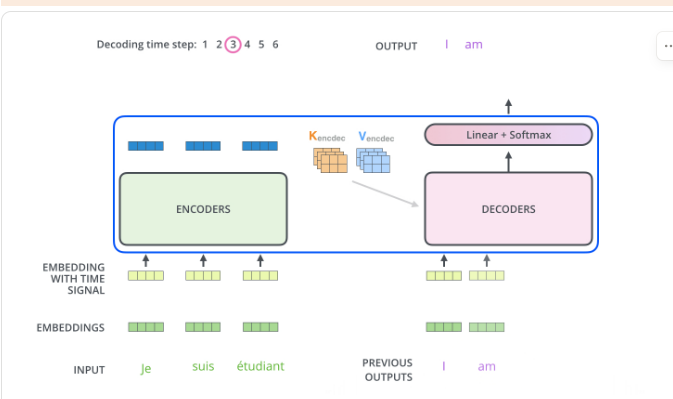

1. 입력 준비: 문장을 [의미 + 위치] 벡터로 바꾸기
2. 인코더: 입력 문장의 [문맥적 의미] 깊이 이해하기
3. 디코더: 번역 문장을 [한 단어씩] 생성하기